**Sonar Data Visualisation**

In [ ]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import pyvista as pv # for making point cloud

In [ ]:
# load the data from the url and set the columns
url = 'https://raw.githubusercontent.com/hpr-digital/PracticalTest/main/sonar_data/sonar_data.csv'
column_names = ['Timestamp', 'Angle', 'X', 'Y', 'Z', 'Roll', 'Pitch', 'Yaw', 'Speed of Sound', 'Date and Checksum']

df = pd.read_csv(url, header=None, names=column_names)
df.head()

,Timestamp,Angle,X,Y,Z,Roll,Pitch,Yaw,Speed of Sound,Date and Checksum
0,2322.002,12552,0.003,0.173,0.047,188.3,2.7,179.4,1482,05/02/2025*2F
1,2322.002,12544,0.003,0.183,0.055,188.3,2.7,179.4,1482,05/02/2025*24
2,2322.002,12536,0.003,0.196,0.048,188.3,2.8,179.6,1482,05/02/2025*24
3,2322.002,12528,0.003,0.195,0.041,188.3,2.8,179.6,1482,05/02/2025*21
4,2322.002,12520,0.003,0.200,0.037,189.0,2.8,179.9,1482,05/02/2025*2A


In [ ]:
# get info on the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8667 entries, 0 to 8666
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Timestamp          8667 non-null   float64
 1   Angle              8667 non-null   int64  
 2   X                  8667 non-null   float64
 3   Y                  8667 non-null   float64
 4   Z                  8667 non-null   float64
 5   Roll               8667 non-null   float64
 6   Pitch              8667 non-null   float64
 7   Yaw                8667 non-null   float64
 8   Speed of Sound     8667 non-null   int64  
 9   Date and Checksum  8667 non-null   object 
dtypes: float64(7), int64(2), object(1)
memory usage: 677.2+ KB


In [ ]:
# calculate the degree of the sonar using the angle column
df['Degree'] = (df.Angle * 0.1) % 360
# calculate  the straight-line distance from the sonar to the detected object also known as range
df['Range'] = np.sqrt((df.X ** 2) + (df.Y ** 2) + (df.Z ** 2))

'**Exploratory Data Analysis**'

<Axes: >

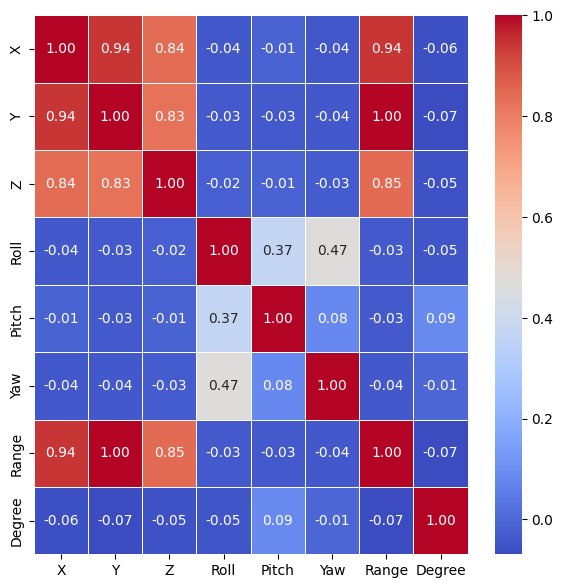

In [ ]:
# make a correlation plot
corr_df = df[['X','Y','Z','Roll','Pitch','Yaw','Range','Degree']].corr()
plt.figure(figsize=(7, 7))
sns.heatmap(corr_df, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

**Comments**:As we can observe from the correlation plot that there is a strong positive correlation among the coordinates(x,y,z) and Range(distance of the detected object from the sonar): this makes sense as the range of the object is calculated using the pythagoras theorem on the given coordinates.

**1. POLAR PLOTS(Range and Degree)**

**Comments**: A polar plot shows how a quantity (like reflected energy) changes with angle. Think of it like plotting in a circle:

* The angle (θ) is the direction (0° to 360°),

* The radius (r) is the magnitude of the measurement — for example, reflected intensity.


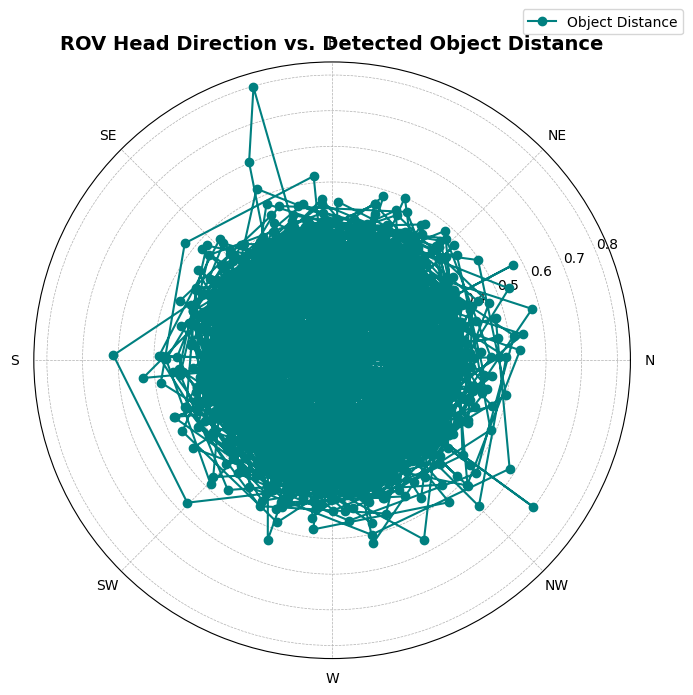

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 7))
ax = plt.subplot(111, projection='polar')

ax.plot(df.Degree, df.Range, marker='o', linestyle='-', color='teal', label='Object Distance')
# set the title and layout of the label
ax.set_title('ROV Head Direction vs. Detected Object Distance', va='bottom', fontsize=14, fontweight='bold')
# set the design of degree measurement
ax.set_thetagrids(range(0, 360, 45), labels=['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW'])
# set the legend and style the line
ax.grid(True, linestyle='--', linewidth=0.5)
ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

plt.tight_layout()
plt.show()


**Comments**: From the circular shape  of the polar plot we can drive following narratives:


1.Uniform Distribution or Constant Magnitude


*   The variable's magnitude is constant across all angles (like a sine wave with fixed amplitude).

* There's no directional preference—i.e.,
it's isotropic (same in all directions).


2.No Strong Angular Trend
If the radius (value) doesn’t vary much with the angle (θ), it suggests:

* There's no dominant direction or orientation.

* The data might be random, symmetrical, or evenly spread over angles.

**Comments**: ❗️What It Does Not Tell You
* It doesn't mean the variable is unchanging over time—just that magnitude vs angle is constant.

* It doesn’t mean randomness, unless paired with erratic phase or time-varying behavior.

**Observations with the Sonar Context**:
 **Sonar Reflections in Polar Plots**:

When using sonar, LIDAR, or radar, a pulse is sent out, and the strength of the returning signal is measured. The strength depends on:

* Distance to the target

* Material and texture of the surface

* Angle of incidence

* Reflectivity or scattering behavior

**Circular Polar Plot = Omnidirectional Reflection
If your polar plot forms a perfect circle, it means:**

* The reflected signal is equal from all directions (i.e., same magnitude at every angle).
This suggests that:

* The object is isotropic
It looks and reflects the same from all directions.


* The surface is diffuse and symmetric
A surface that reflects energy evenly like matte paint or a diffuse surface (Lambertian reflector).

* Contrast this with a mirror, which reflects mostly in one direction (specular).
*  There is no directional bias or feature
The system doesn’t detect any angles that stand out — maybe because the object is far, uniform, or non-reflective.

* Could also mean no object is present (just ambient noise or environmental uniformity).

 **Takeaway
:A circular polar plot in sonar/LIDAR/radar means:**

The object or surface does not favor any direction in terms of reflection.

The sensor sees a balanced return from every angle.

It likely indicates symmetry, diffuse reflectance, or no prominent geometric structure.

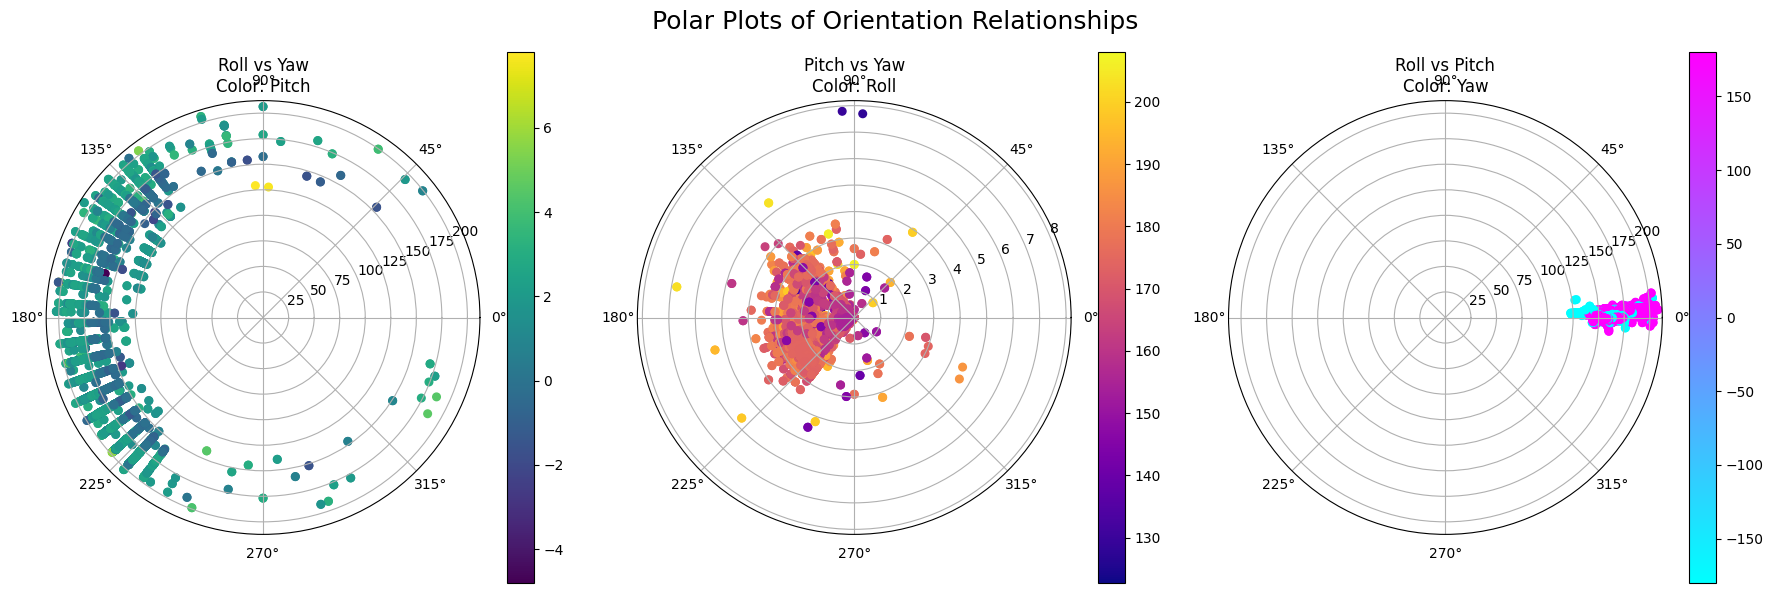

In [ ]:
# plotting Yaw vs Roll vs Pitch with relation to each other
yaw = df.Yaw
roll =  df.Roll
pitch = df.Pitch
# Convert to radians where needed (theta in polar = angle)
roll_rad = np.deg2rad(roll)
pitch_rad = np.deg2rad(pitch)

fig, axs = plt.subplots(1, 3, subplot_kw={'projection': 'polar'}, figsize=(18, 6))
fig.suptitle("Polar Plots of Orientation Relationships", fontsize=18)

# Plot 1: Roll vs Yaw (color = Pitch)
sc1 = axs[0].scatter(yaw, np.abs(roll), c=pitch, cmap='viridis', s=30)
axs[0].set_title("Roll vs Yaw\nColor: Pitch")
plt.colorbar(sc1, ax=axs[0], orientation='vertical')

# Plot 2: Pitch vs Yaw (color = Roll)
sc2 = axs[1].scatter(yaw, np.abs(pitch), c=roll, cmap='plasma', s=30)
axs[1].set_title("Pitch vs Yaw\nColor: Roll")
plt.colorbar(sc2, ax=axs[1], orientation='vertical')

# Plot 3: Roll vs Pitch (color = Yaw)
sc3 = axs[2].scatter(pitch_rad, np.abs(roll), c=yaw, cmap='cool', s=30)
axs[2].set_title("Roll vs Pitch\nColor: Yaw")
plt.colorbar(sc3, ax=axs[2], orientation='vertical')

plt.tight_layout()
plt.show()


**comments**: the polar plot of ROLL, PITCH and YAW provides insights into the  the orientation and movement of the sonar device in relation to the environment it is scanning. It helps in accurately map the environment

**comments**: in the context of polar coordinates, the angular component (theta) is generally expected in radians, because the angular movement in the polar system follows the unit circle's geometry, which is naturally described in radians.

Degrees can be used in some cases, but when dealing with angles in polar plots, radians are the standard unit.

**Positional Analysis**

Text(0.5, 0, 'Downward position relative to the sonar')

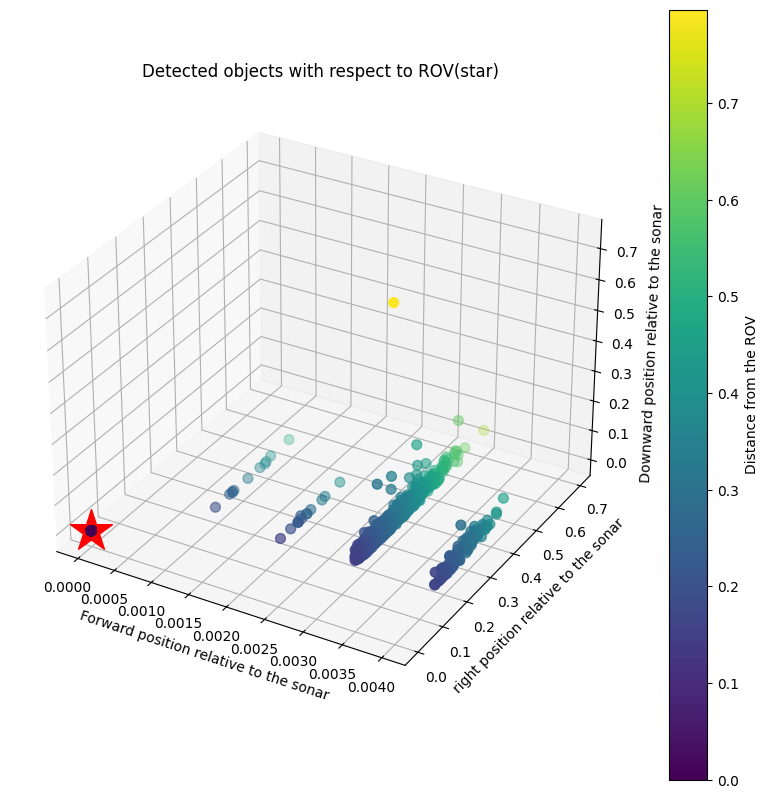

In [ ]:
plt.figure(figsize=(10,10))

# Create 3D axis
ax = plt.axes(projection='3d')

# Scatter plot
ax.scatter(0, 0, 0, color='red', marker='*', s=1000, label='ROV Position')
sc = ax.scatter(df.X, df.Y, df.Z,c = df.Range, cmap='viridis', s=50)  # Set marker size (s) and colormap

# Add a colorbar to indicate the Z values with colors
plt.colorbar(sc, ax=ax, label='Distance from the ROV')
# Add title and labels
ax.set_title('Detected objects with respect to ROV(star)', fontsize=12)
ax.set_xlabel('Forward position relative to the sonar')
ax.set_ylabel('right position relative to the sonar')
ax.set_zlabel('Downward position relative to the sonar')

**Comments**:the detected objects are relatively closer but  dispersed around.
The elevation of the objects seems to be the same as the sonar.

**2. POINT CLOUD**

In [ ]:
display = Display(visible=0, size=(800, 600))
display.start()

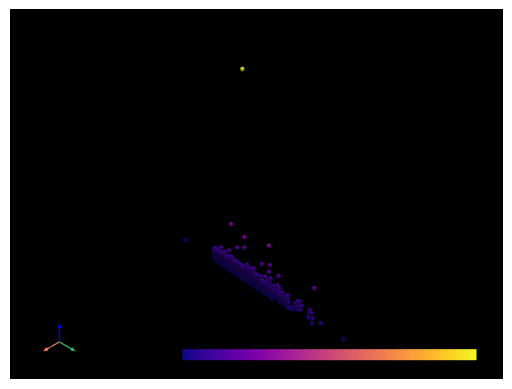

In [ ]:
# set the (X,Y,Z) coordinates of the point cloud
points = df[['X', 'Y', 'Z']].values
# fit the points to prepare the point cloud
cloud = pv.PolyData(points)
cloud["elevation"] = points[:, 2]

# set the layout of the plot
plotter = pv.Plotter(off_screen=True)
plotter.set_background("black")
plotter.add_axes()
plotter.show_grid()

# enhance the visualisation of the point cloud
plotter.add_points(
    cloud,
    scalars="elevation",
    cmap="plasma",
    point_size=10,
    render_points_as_spheres=True,
    lighting=True,
    specular=0.4,)
plotter.show(auto_close=False)
img = plotter.screenshot(None)
plotter.close()

# display the point cloud
plt.imshow(img)
plt.axis("off")
plt.show()


**Comments**: the precise spatial coordinates of individual points in a 3D space, typically represented as X, Y, and Z coordinates

**Comments**: from the point cloud we can oberve that most of the detected are cluttered around the surface with not much elevation

**3. Angle Analysis (Roll, Pitch, Yaw)**

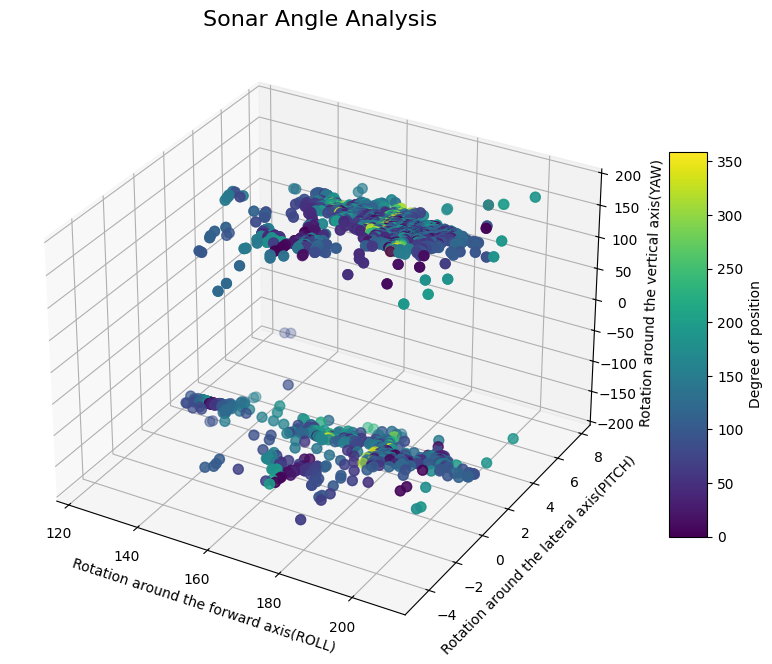

In [ ]:
plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')

# 3D Scatter plot
sc = ax.scatter(df.Roll, df.Pitch, df.Yaw, c=df.Degree, cmap='viridis', s=50)

# Add colorbar
cb = plt.colorbar(sc, ax=ax, shrink=0.5, aspect=10)
cb.set_label('Degree of position')

# Add title and labels
ax.set_title('Sonar Angle Analysis', fontsize=16)
ax.set_xlabel('Rotation around the forward axis(ROLL)')
ax.set_ylabel('Rotation around the lateral axis(PITCH)')
ax.set_zlabel('Rotation around the vertical axis(YAW)')

plt.show()

**Comments**: from the above plot we can observe that there is a strong range of rotation of the sonar along the forward axis, with not much movement around the lateral axis and vertical axis.



**Task 2:  Depth Estimation from Images**

**Monocular Depth Estimation**

**Comments:**a computer vision task that predicts depth from a single RGB image without the need for additional equipment or techniques

In [ ]:
# import the required libraries
import torch
import torch.nn as nn
import torchvision
from torchvision import transforms
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
from io import BytesIO

**1. Load Model and Device Selection**

In [ ]:
# Load MiDaS model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # check for GPU availability
midas = torch.hub.load("intel-isl/MiDaS", "MiDaS_small")
midas.to(device).eval()

/usr/local/lib/python3.11/dist-packages/torch/hub.py:330: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/intel-isl/MiDaS/zipball/master" to /root/.cache/torch/hub/master.zip
/usr/local/lib/python3.11/dist-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.l

Loading weights:  None


/usr/local/lib/python3.11/dist-packages/torch/hub.py:330: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/rwightman/gen-efficientnet-pytorch/zipball/master" to /root/.cache/torch/hub/master.zip
Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/tf_efficientnet_lite3-b733e338.pth" to /root/.cache/torch/hub/checkpoints/tf_efficientnet_lite3-b733e338.pth
Downloading: "https://github.

**2. Load Input Transforms**

In [ ]:
# Load transform
midas_transforms = torch.hub.load("intel-isl/MiDaS", "transforms")
transform = midas_transforms.small_transform

**Comments:** The MiDaS model is a machine learning model designed for monocular depth estimation, which means it can estimate depth from a single image.
 It uses a residual network (ResNet) architecture, which is robust to vanishing gradients, allowing it to extract multi-channeled feature maps from input images and capture hierarchical information

**Comments**: small_transform is a transformation pipeline that resizes the input image, normalizes it, and performs any other necessary preprocessing steps for the model to work efficiently and accurately.

**3.Load and Prepare image**

In [ ]:
# Upload the image
uploaded = files.upload()

# Open the image ---> convert to RGB ----> to NumPy array
img = Image.open("image1.jpg").convert("RGB")
img_np = np.array(img)

Saving image1.jpg to image1.jpg


**4. Apply Transformation:**
Purpose: Prepares image for the MiDaS model.

**processed**: Contains transformed image (possibly in a dictionary).

**input_batch**: Final tensor ready for model input, moved to the right device.

In [ ]:
# Preprocessing the image and transformation
processed = transform(img_np)


if isinstance(processed, dict):
    input_batch = processed["image"].to(device)
else:
    input_batch = processed.to(device)

**5. Inference (Depth Prediction):**
**Model Output**: A single-channel depth map (coarse resolution).

**Interpolation**: Resizes the output depth map to match the original image size using bicubic interpolation.

**unsqueeze(1)**: Adds a channel dimension.

**squeeze()**: Removes added dimensions for visualization.

In [ ]:
# Inference
with torch.no_grad():
    prediction = midas(input_batch)
    prediction = torch.nn.functional.interpolate(
        prediction.unsqueeze(1),
        size=img.size[::-1],
        mode="bicubic",
        align_corners=False
    ).squeeze()

6. **Convert to NumPy and Visualize**

In [ ]:
# Convert to NumPy
depth_map = prediction.cpu().numpy()

**comments:** .cpu() part is used when you're working with PyTorch tensors that are on the GPU (e.g., CUDA) and you want to convert them to NumPy arrays — but NumPy can't handle GPU tensors directly, so you first move them to the CPU.

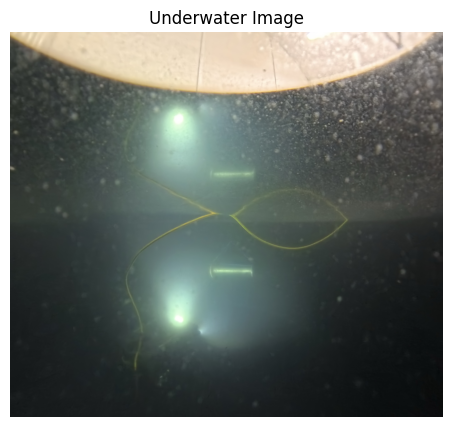

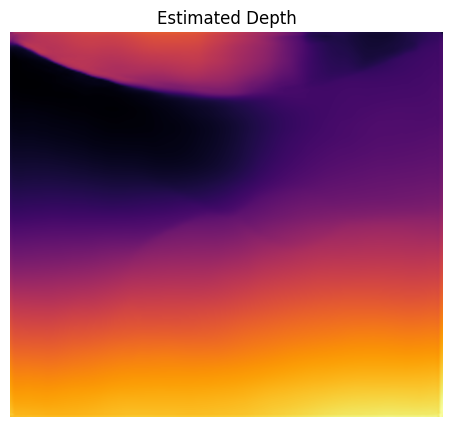

In [ ]:
# Display the Underwater Image and the Depth Map
plt.figure(figsize=(10, 5))

plt.title("Underwater Image")
plt.imshow(img)
plt.axis("off")

plt.figure(figsize=(10,5))
plt.title("Depth Map")
plt.imshow(depth_map, cmap='inferno')
plt.axis("off")
plt.show()

**Comments:**  a depth map is an image or image channel that contains information relating to the distance of the surfaces of scene objects from a viewpoint

**Comments:**A depth map in monocular depth estimation (MDE) represents the distance of objects in a scene from a single camera viewpoint.

**Stereo depth estimation**

**Comments**:  a technique used to estimate the depth of objects in a scene by analyzing two images taken from slightly different viewpoints, typically using a stereo camera system

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving image1.jpg to image1 (3).jpg


In [ ]:
# import the required libraries
import cv2
import numpy as np
from matplotlib import pyplot as plt

**# 1. Load images and resize the images**

In [ ]:
left_img = cv2.imread("image1.jpg", cv2.IMREAD_GRAYSCALE)
right_img = cv2.imread("image2.jpg", cv2.IMREAD_GRAYSCALE)

In [ ]:
height, width = 480, 640
left_img = cv2.resize(left_img, (width, height))
right_img = cv2.resize(right_img, (width, height))

**2. plot the left and right images**

(np.float64(-0.5), np.float64(639.5), np.float64(479.5), np.float64(-0.5))

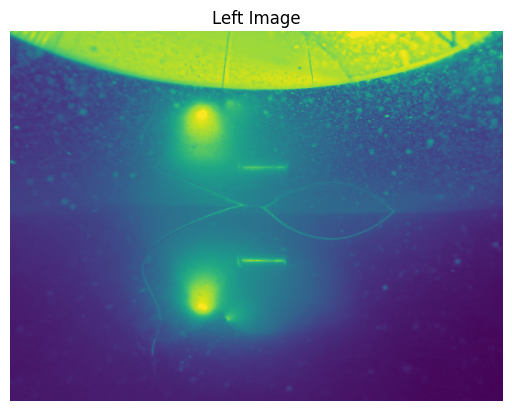

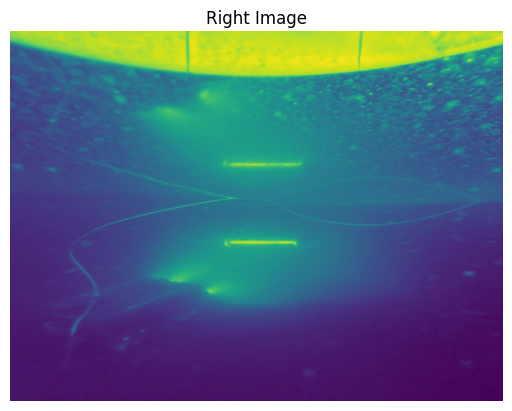

In [ ]:
plt.figure()
plt.imshow(left_img)
plt.title('Left Image')
plt.axis('off')

plt.figure()
plt.imshow(right_img)
plt.title('Right Image')
plt.axis('off')


**3. Preprocessing - Resizing the Images**
This is essential because stereo matching requires pixel-wise correspondence between the two images.



In [ ]:
# make adjustments to enhance visualisation
height, width = min(left_img.shape[0], right_img.shape[0]), min(left_img.shape[1], right_img.shape[1])
left = cv2.resize(left_img, (width, height))
right = cv2.resize(right_img, (width, height))

**4. Contrast Enhancement**: This step helps improve feature matching between the two images by making edges and textures more prominent.

In [ ]:
# Enhance contrast
left = cv2.equalizeHist(left)
right = cv2.equalizeHist(right)


 **3. Disparity Map Computation**

In [ ]:
# 5. Compute disparity
stereo = cv2.StereoSGBM_create(
    minDisparity=0,
    numDisparities=128,  # Increase for more depth levels
    blockSize=5,
    P1=8*3*5**2,
    P2=32*3*5**2,
    disp12MaxDiff=1
)

disparity = stereo.compute(left, right)

**Comments:** StereoSGBM model is a method used for computing stereo correspondence using the semi-global block matching algorithm.

**# 6. Normalize and display the depth map**
Disparity values are normalized to a 0–255 range so that they can be visualized properly.

In [ ]:
disparity_normalized = cv2.normalize(disparity, None, alpha=0, beta=255,
                                  norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)

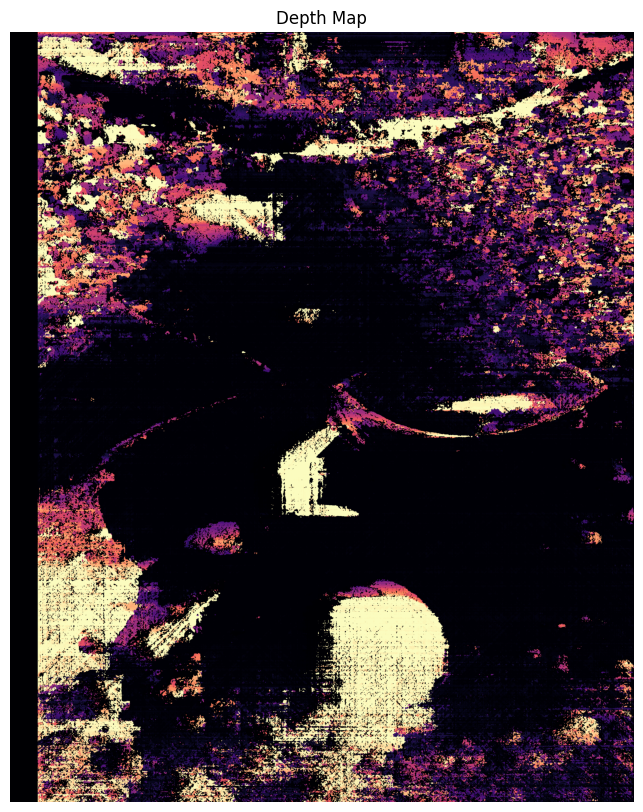

In [ ]:
plt.figure(figsize=(12,10))
plt.imshow(disparity_normalized, cmap='magma'), plt.title("Depth Map")
plt.axis('off')
plt.show()

**Comments**: map is derived from stereo images captured by two cameras positioned at a known distance apart.